In [1]:
import pandas as pd
# import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from distfit import distfit
from collections import Counter
from wordcloud import WordCloud

In [32]:
mast = pd.read_csv('final_master.csv')

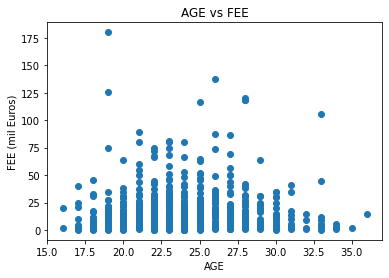

In [42]:
shuffled = mast.sample(frac=1, random_state=1).reset_index()
shuffled.drop('index', axis=1, inplace=True)
x = shuffled['AGE']
y = shuffled['FEE']
plt.scatter(x, y)
plt.xlabel('AGE')
plt.ylabel('FEE (mil Euros)')
plt.title('AGE vs FEE')
# z = np.polyfit(x, y, 1)
# p = np.poly1d(z)
# plt.plot(x, p(x), "r-o")
plt.show()

In [48]:
print("mu:",mast['FEE'].mean())
print("sigma:",mast['FEE'].std())

mu: 18.0456129985229
sigma: 19.903402153004134


In [44]:
mast['RATING'].std()

0.4667622977959502

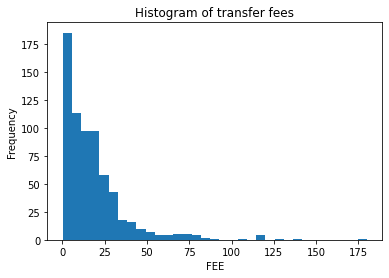

In [54]:
plt.hist(mast['FEE'], bins=33)
plt.xlabel('FEE')
plt.ylabel('Frequency')
plt.title('Histogram of transfer fees')
plt.show()

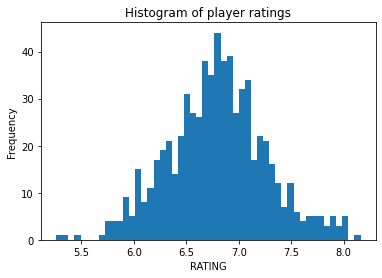

In [55]:
plt.hist(mast['RATING'], bins=50)
plt.xlabel('RATING')
plt.ylabel('Frequency')
plt.title('Histogram of player ratings')
plt.show()

In [6]:
rating = mast['RATING']
fee = mast['FEE']
age = mast['AGE']

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.42942] [loc=6.796 scale=0.466]
[distfit] >[expon     ] [0.00 sec] [RSS: 7.99398] [loc=5.260 scale=1.536]
[distfit] >[pareto    ] [0.08 sec] [RSS: 8.94788] [loc=-0.042 scale=5.302]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 0.61078] [loc=6.795 scale=0.383]
[distfit] >[t         ] [0.10 sec] [RSS: 0.389424] [loc=6.795 scale=0.446]
[distfit] >[genextreme] [0.09 sec] [RSS: 0.519314] [loc=6.625 scale=0.463]
[distfit] >[gamma     ] [0.05 sec] [RSS: 0.434382] [loc=-6.600 scale=0.016]
[distfit] >[lognorm   ] [0.11 sec] [RSS: 0.433958] [loc=-13.583 scale=20.374]
[distfit] >[beta      ] [0.14 sec] [RSS: 0.442328] [loc=-0.992 scale=506042.222]
[distfit] >[uniform   ] [0.00 sec] [RSS: 5.20192] [loc=5.260 scale=2.900]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 0.432354] [loc=-80.221 scale=13.069]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nt\nRSS(df=22.9281, loc=6.79504, scale=0.445857)'}, xlabel='Values', ylabel='Frequency'>)

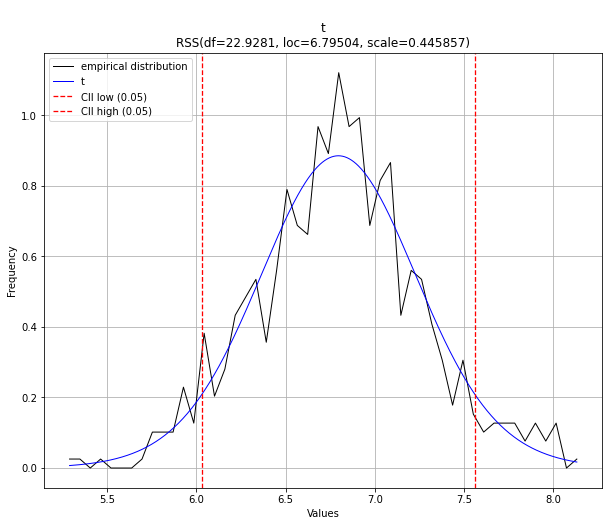

In [7]:
dist = distfit()
dist.fit_transform(rating)
dist.plot()

[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.00274058] [loc=18.046 scale=19.889]
[distfit] >[expon     ] [0.00 sec] [RSS: 0.000283852] [loc=0.100 scale=17.946]
[distfit] >[pareto    ] [0.03 sec] [RSS: 0.00317424] [loc=-1.685 scale=1.785]
[distfit] >[dweibull  ] [0.05 sec] [RSS: 0.00207703] [loc=13.000 scale=12.281]
[distfit] >[t         ] [0.04 sec] [RSS: 0.00177674] [loc=12.851 scale=9.732]
[distfit] >[genextreme] [0.11 sec] [RSS: 0.000955136] [loc=8.223 scale=8.115]
[distfit] >[gamma     ] [0.08 sec] [RSS: 0.000282137] [loc=0.100 scale=18.219]
[distfit] >[lognorm   ] [0.10 sec] [RSS: 0.000616068] [loc=-1.041 scale=12.340]
[distfit] >[beta      ] [0.14 sec] [RSS: 0.000280538] [loc=0.100 scale=3905.016]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.00664657] [loc=0.100 scale=179.900]
[distfit] >[loggamma  ] [0.06 sec] [RSS: 0.002825] [loc=-8652.220 scale=1089.685]
[distfit] >Compute confidence interv

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nbeta\nRSS(a=0.983338, b=213.044, loc=0.1, scale=3905.02)'}, xlabel='Values', ylabel='Frequency'>)

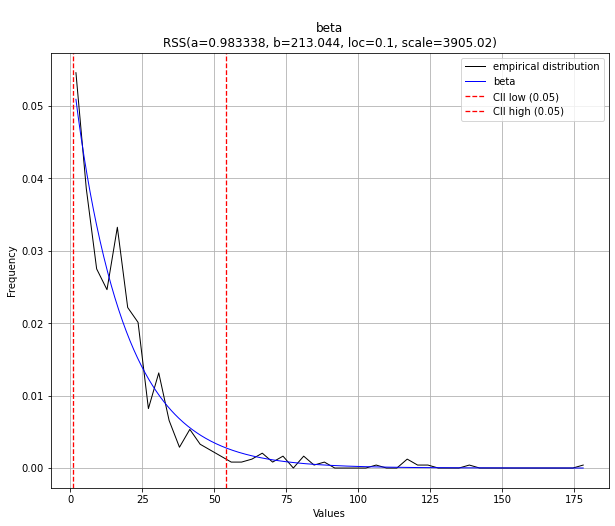

In [8]:
dist.fit_transform(fee)
dist.plot()

[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.171065] [loc=23.390 scale=4.064]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.250357] [loc=14.000 scale=9.390]
[distfit] >[pareto    ] [0.06 sec] [RSS: 0.28506] [loc=-0.067 scale=14.067]
[distfit] >[dweibull  ] [0.02 sec] [RSS: 0.171245] [loc=23.488 scale=3.688]
[distfit] >[t         ] [0.09 sec] [RSS: 0.17068] [loc=23.272 scale=3.931]
[distfit] >[genextreme] [0.11 sec] [RSS: 0.160082] [loc=21.490 scale=3.169]
[distfit] >[gamma     ] [0.00 sec] [RSS: 0.160838] [loc=13.665 scale=1.650]
[distfit] >[lognorm   ] [0.12 sec] [RSS: 0.159711] [loc=12.302 scale=10.387]
[distfit] >[beta      ] [0.23 sec] [RSS: 0.160764] [loc=13.710 scale=4150003.372]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.23032] [loc=14.000 scale=25.000]
[distfit] >[loggamma  ] [0.07 sec] [RSS: 0.171476] [loc=-1134.141 scale=158.806]
[distfit] >Compute confidence interval [parametric]
[distfit] >

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nlognorm\nRSS(s=0.362435, loc=12.3025, scale=10.3867)'}, xlabel='Values', ylabel='Frequency'>)

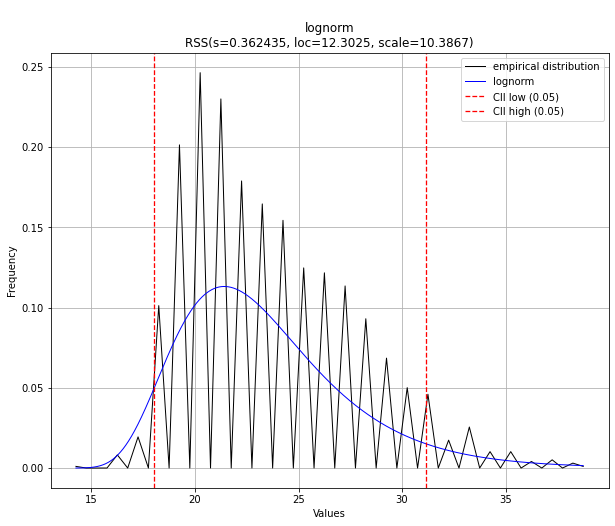

In [9]:
trial = pd.read_csv('new_merge_wloan.csv')
trial.dropna(inplace=True)

dist.fit_transform(trial['AGE'])
dist.plot()

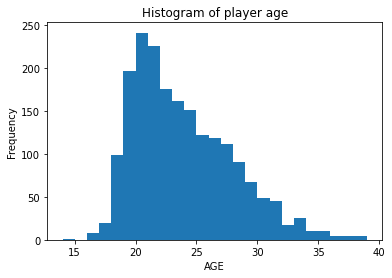

In [61]:
plt.hist(trial['AGE'], bins=25)
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Histogram of player age')
plt.show()

[distfit] >Cleaning previous fitted model results..
[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.301123] [loc=23.907 scale=3.599]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.398535] [loc=16.000 scale=7.907]
[distfit] >[pareto    ] [0.04 sec] [RSS: 0.435335] [loc=-0.081 scale=16.081]
[distfit] >[dweibull  ] [0.01 sec] [RSS: 0.292056] [loc=23.542 scale=3.181]
[distfit] >[t         ] [0.03 sec] [RSS: 0.301123] [loc=23.907 scale=3.599]
[distfit] >[genextreme] [0.06 sec] [RSS: 0.298979] [loc=22.420 scale=3.242]
[distfit] >[gamma     ] [0.03 sec] [RSS: 0.298964] [loc=11.769 scale=1.084]
[distfit] >[lognorm   ] [0.08 sec] [RSS: 0.299119] [loc=5.428 scale=18.134]
[distfit] >[beta      ] [0.02 sec] [RSS: 0.298452] [loc=14.956 scale=29.766]
[distfit] >[uniform   ] [0.01 sec] [RSS: 0.369664] [loc=16.000 scale=20.000]
[distfit] >[loggamma  ] [0.06 sec] [RSS: 0.301158] [loc=-1164.055 scale=157.595]
[distfit] >Compute confidence interval [parametric]
[distfit] >pl

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ndweibull\nRSS(c=1.36642, loc=23.5417, scale=3.18098)'}, xlabel='Values', ylabel='Frequency'>)

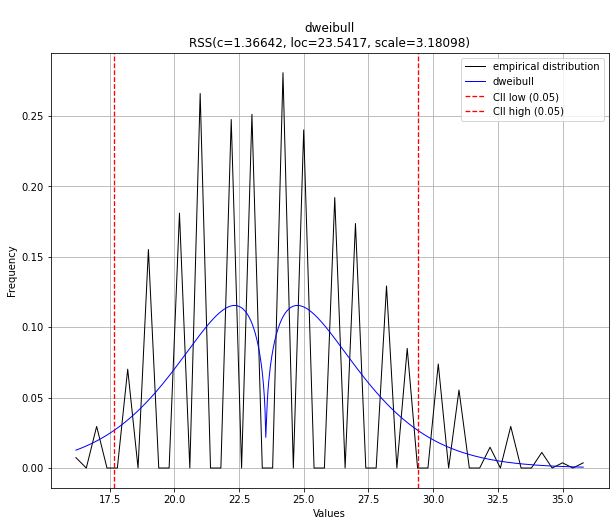

In [10]:
dist.fit_transform(age)
dist.plot()

<AxesSubplot:>

<Figure size 800x480 with 0 Axes>

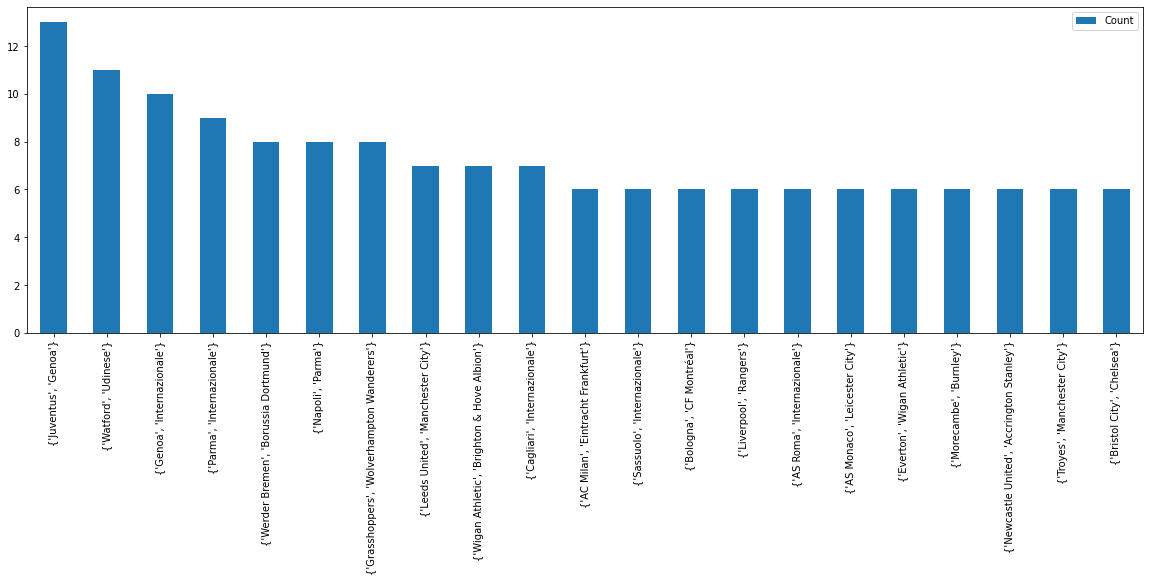

In [67]:
mast2 = pd.read_csv('no_duplicates_transfer.csv')
plt.figure(figsize=(10, 6), dpi=80)
rel =[]
teamf = mast2['FROM']
teamt = mast2['TO']
teams = mast['FROM']
teams.append(mast2['TO'])
for i in range(len(mast2['FROM'])):
    teamconcat = set([mast2['FROM'].iloc[i], mast2['TO'].iloc[i]])
    rel.append(str(teamconcat))
    
# uq_rel = set(rel)
team_cts = Counter(teams)
teamfc = Counter(teamf)
teamtc = Counter(teamt)
teamcon = Counter(rel)
df = pd.DataFrame.from_dict(teamcon, orient='index', columns=['Count'])
df = df[df['Count']>5]
df.sort_values(by=['Count'], ascending=False, inplace=True)


df.plot(kind='bar', figsize=(20,6))
# df



In [65]:
len(mast2)

4596

In [12]:
df['Count'].max()

13

In [13]:
def percent(x, df=df):
    trans1 = len(df[df['Count']>x-1])
    trans2 = len(df[df['Count']>x])
    return (trans2/trans1)*100

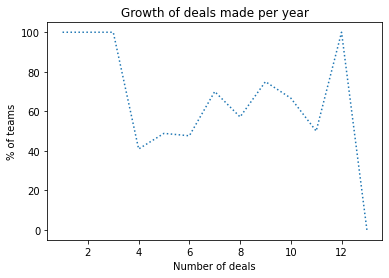

In [69]:
pos = []
per = []

for i in range(13):
    pos.append(i+1)
    per.append(percent(i+1))
    
plt.plot(pos, per, linestyle = 'dotted')
plt.xlabel('Number of deals')
plt.ylabel('% of teams')
plt.title('Growth of deals made per year')
plt.show()

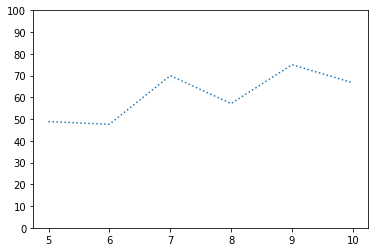

In [15]:
plt.plot(pos[4:10], per[4:10], linestyle = 'dotted')
plt.xticks(range(5,11))
plt.yticks(range(0,101, 10))
plt.show()

In [16]:
print(pos)
print(per)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[100.0, 100.0, 100.0, 40.95238095238095, 48.837209302325576, 47.61904761904761, 70.0, 57.14285714285714, 75.0, 66.66666666666666, 50.0, 100.0, 0.0]


In [17]:
len(rel)

4596

In [18]:
uq_rel = set(rel)
uq_rel = list(uq_rel)

for i in range(len(uq_rel)):
    uq_rel[i] = tuple(uq_rel[i])
    


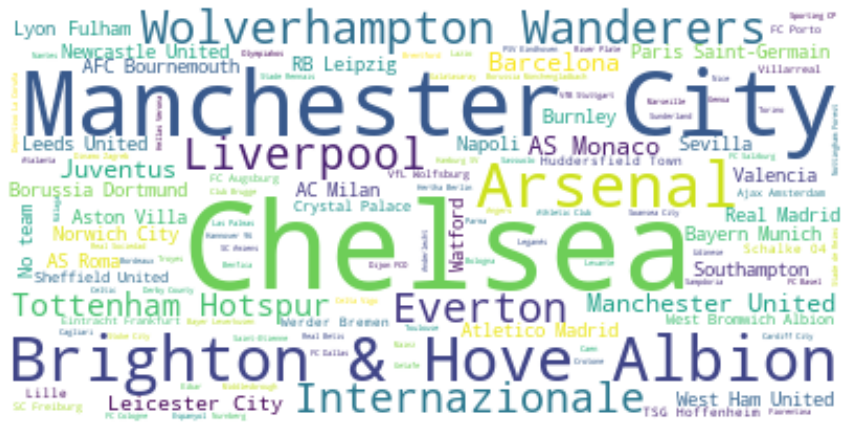

In [19]:
wordcloud_spam = WordCloud(background_color="white").generate_from_frequencies(teamfc)

# Lines 2 - 5
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

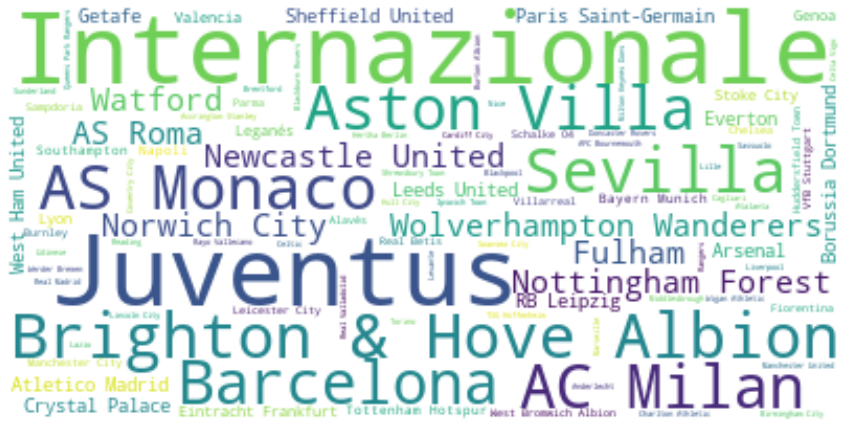

In [20]:
wordcloud_spam = WordCloud(background_color="white").generate_from_frequencies(teamtc)

# Lines 2 - 5
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

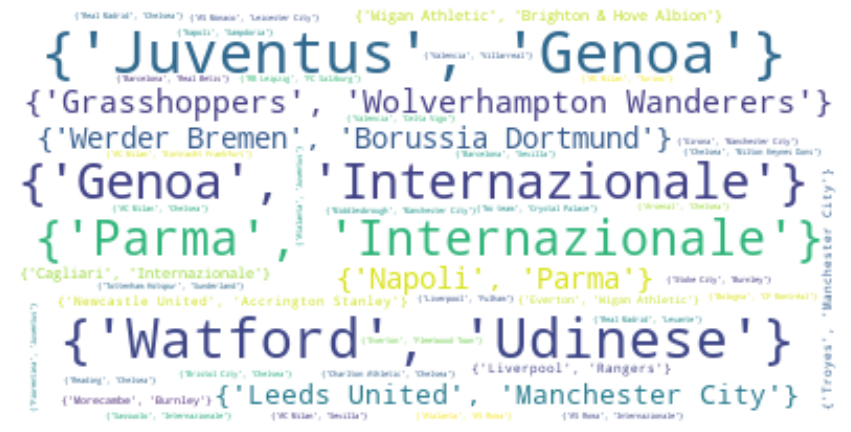

In [21]:
wordcloud_spam = WordCloud(background_color="white").generate_from_frequencies(teamcon)

# Lines 2 - 5
plt.figure(figsize = (15,15))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2]:
df = pd.read_csv('withratingsnall.csv')
df

,DATE,NAME,RATING,FROM,FT_RATING,TO,TT_RATING,FEE,POSITION,HEIGHT,FOOT,AGE,NATION
0,19-Jul-22,Ben Davies,7.07,Liverpool,6.96,Rangers,0.00,4.70,Defence,181,Left,26,England
1,01-Feb-21,Ben Davies,6.69,Preston North End,0.00,Liverpool,6.96,1.85,Defence,181,Left,25,England
2,13-Jul-22,Raheem Sterling,7.42,Manchester City,7.08,Chelsea,6.89,56.20,Attack,170,Right,27,England
3,12-Jul-22,Nathan Collins,7.11,Burnley,6.70,Wolverhampton Wanderers,6.74,25.94,Defence,193,Right,21,Ireland
4,24-Jun-21,Nathan Collins,6.80,Stoke City,6.70,Burnley,6.70,14.65,Defence,193,Right,20,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,26-Jun-18,Javier Pastore,7.12,Paris Saint-Germain,7.02,AS Roma,6.81,24.70,Midfield,187,Right,29,Argentina
673,19-Jun-18,Willem Geubbels,6.28,Lyon,6.87,AS Monaco,6.75,20.00,Attack,185,Right,16,France
674,19-Jun-18,Issa Diop,6.89,Toulouse,6.60,West Ham United,6.75,25.00,Defence,194,Right,21,France
675,31-Jan-18,Lucas Moura,6.49,Paris Saint-Germain,7.02,Tottenham Hotspur,6.86,28.40,Attack,172,Right,25,Brazil


In [3]:
fillr = pd.read_csv('tm_rating_filler.csv')
fillr

,Team,Rating
0,New York Red Bulls,6.65
1,Sunderland,6.65
2,Luton Town,6.58
3,Cremonese,6.60
4,Fortuna Düsseldorf,6.68
...,...,...
102,Braga,6.76
103,Palmeiras,6.79
104,Blackburn Rovers,6.78
105,Dinamo Zagreb,0.00


In [8]:
dictn = dict(zip(fillr['Team'], fillr['Rating']))

In [11]:
for i in range(len(df)):
    if df['FT_RATING'].iloc[i] == 0:
        if df['FROM'].iloc[i] in dictn.keys():
            df['FT_RATING'].iloc[i] = dictn[df['FROM'].iloc[i]]
    if df['TT_RATING'].iloc[i] == 0:
        if df['TO'].iloc[i] in dictn.keys():
            df['TT_RATING'].iloc[i] = dictn[df['TO'].iloc[i]]
    else:
        continue

In [12]:
df

,DATE,NAME,RATING,FROM,FT_RATING,TO,TT_RATING,FEE,POSITION,HEIGHT,FOOT,AGE,NATION
0,19-Jul-22,Ben Davies,7.07,Liverpool,6.96,Rangers,6.80,4.70,Defence,181,Left,26,England
1,01-Feb-21,Ben Davies,6.69,Preston North End,6.77,Liverpool,6.96,1.85,Defence,181,Left,25,England
2,13-Jul-22,Raheem Sterling,7.42,Manchester City,7.08,Chelsea,6.89,56.20,Attack,170,Right,27,England
3,12-Jul-22,Nathan Collins,7.11,Burnley,6.70,Wolverhampton Wanderers,6.74,25.94,Defence,193,Right,21,Ireland
4,24-Jun-21,Nathan Collins,6.80,Stoke City,6.70,Burnley,6.70,14.65,Defence,193,Right,20,Ireland
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,26-Jun-18,Javier Pastore,7.12,Paris Saint-Germain,7.02,AS Roma,6.81,24.70,Midfield,187,Right,29,Argentina
673,19-Jun-18,Willem Geubbels,6.28,Lyon,6.87,AS Monaco,6.75,20.00,Attack,185,Right,16,France
674,19-Jun-18,Issa Diop,6.89,Toulouse,6.60,West Ham United,6.75,25.00,Defence,194,Right,21,France
675,31-Jan-18,Lucas Moura,6.49,Paris Saint-Germain,7.02,Tottenham Hotspur,6.86,28.40,Attack,172,Right,25,Brazil


In [13]:
df.to_csv('alpha.csv')